In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import datetime
from datetime import timedelta
import matplotlib.patches as mpatches

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.style.use("markerr.mplstyle")

In [8]:
df = pd.DataFrame({
    'data_level':['Zip Code','Zip Code',
                    'Zip Code','Zip Code',
                    'State','State',
                    'Local Government','Local Government',
                  'State','State',
                  'Zip Code', 'Zip Code'
                   ],
    'data_num':[0,0,
                1,1,
                2,2,
                3,3,
                4,4,
                5,5,
               ],
    'date':[datetime.datetime(2014,1,1),datetime.datetime(2021,7,1),
            datetime.datetime(2012,1,1),datetime.datetime(2021,7,1),
            datetime.datetime(2012,1,1),datetime.datetime(2021,6,1),
            datetime.datetime(2012,1,1),datetime.datetime(2021,7,1),
            datetime.datetime(2011,1,1),datetime.datetime(2021,7,1),
            datetime.datetime(2011,1,1),datetime.datetime(2019,1,1),

           ],
    'frequency':['monthly','monthly',
                 'daily','daily',
                 'monthly','monthly',
                 'monthly','monthly',
                 'quarterly','quarterly',
                 'yearly','yearly'],

                 
    'data_name':['Zillow Rent Index','Zillow Rent Index',
                 'Business Permits','Business Permits',
                 'Natural Gas Production','Natural Gas Production',
                 'City Tax Collection','City Tax Collection',
                 'Texas State Polling','Texas State Polling',
                 'American Community Survey', 'American Community Survey'
       ]
})

In [9]:
# sdate = datetime.datetime(2011,1,1)
# edate = datetime.datetime(2019,1,1)
# x = 30
# [sdate+timedelta(days=x) for x in range((edate-sdate).days)]

In [10]:
viz_df = df.copy()
df_temp = pd.DataFrame()
for data_name in viz_df.data_name.unique():
    data_name_df = viz_df[viz_df['data_name']==data_name]
    data_name_df=data_name_df.reset_index(drop=True)
    data_level = data_name_df.loc[0,'data_level']
    data_num = data_name_df.loc[0,'data_num']
    frequency = data_name_df.loc[0,'frequency']
    #creating new dates between existing dates
    sdate = data_name_df.loc[0,'date']
    edate = data_name_df.loc[1,'date']
    date_delta = 30
    date = [sdate+timedelta(days=x) for x in range((edate-sdate).days)]
    num_new_rows = len(date)
    new_row = {'date':date,
               'data_num':[data_num]*num_new_rows,
               'data_name':[data_name]*num_new_rows,
               'frequency':[frequency]*num_new_rows,
               'data_level':[data_level]*num_new_rows,               
           }
    df_new_row = pd.DataFrame(new_row)
    df_temp = df_temp.append(df_new_row, ignore_index = True)
viz_df = viz_df.append(df_temp, ignore_index = True)

In [11]:
sns.color_palette()

[(0.8, 0.4, 0.4666666666666667),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.8666666666666667, 0.8, 0.4666666666666667),
 (0.06666666666666667, 0.4666666666666667, 0.2),
 (0.5333333333333333, 0.8, 0.9333333333333333),
 (0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.6, 0.6, 0.2),
 (0.6666666666666666, 0.26666666666666666, 0.6)]

In [12]:
df

,data_level,data_num,date,frequency,data_name
0,Zip Code,0,2014-01-01,monthly,Zillow Rent Index
1,Zip Code,0,2021-07-01,monthly,Zillow Rent Index
2,Zip Code,1,2012-01-01,daily,Business Permits
3,Zip Code,1,2021-07-01,daily,Business Permits
4,State,2,2012-01-01,monthly,Natural Gas Production
5,State,2,2021-06-01,monthly,Natural Gas Production
6,Local Government,3,2012-01-01,monthly,City Tax Collection
7,Local Government,3,2021-07-01,monthly,City Tax Collection
8,State,4,2011-01-01,quarterly,Texas State Polling
9,State,4,2021-07-01,quarterly,Texas State Polling


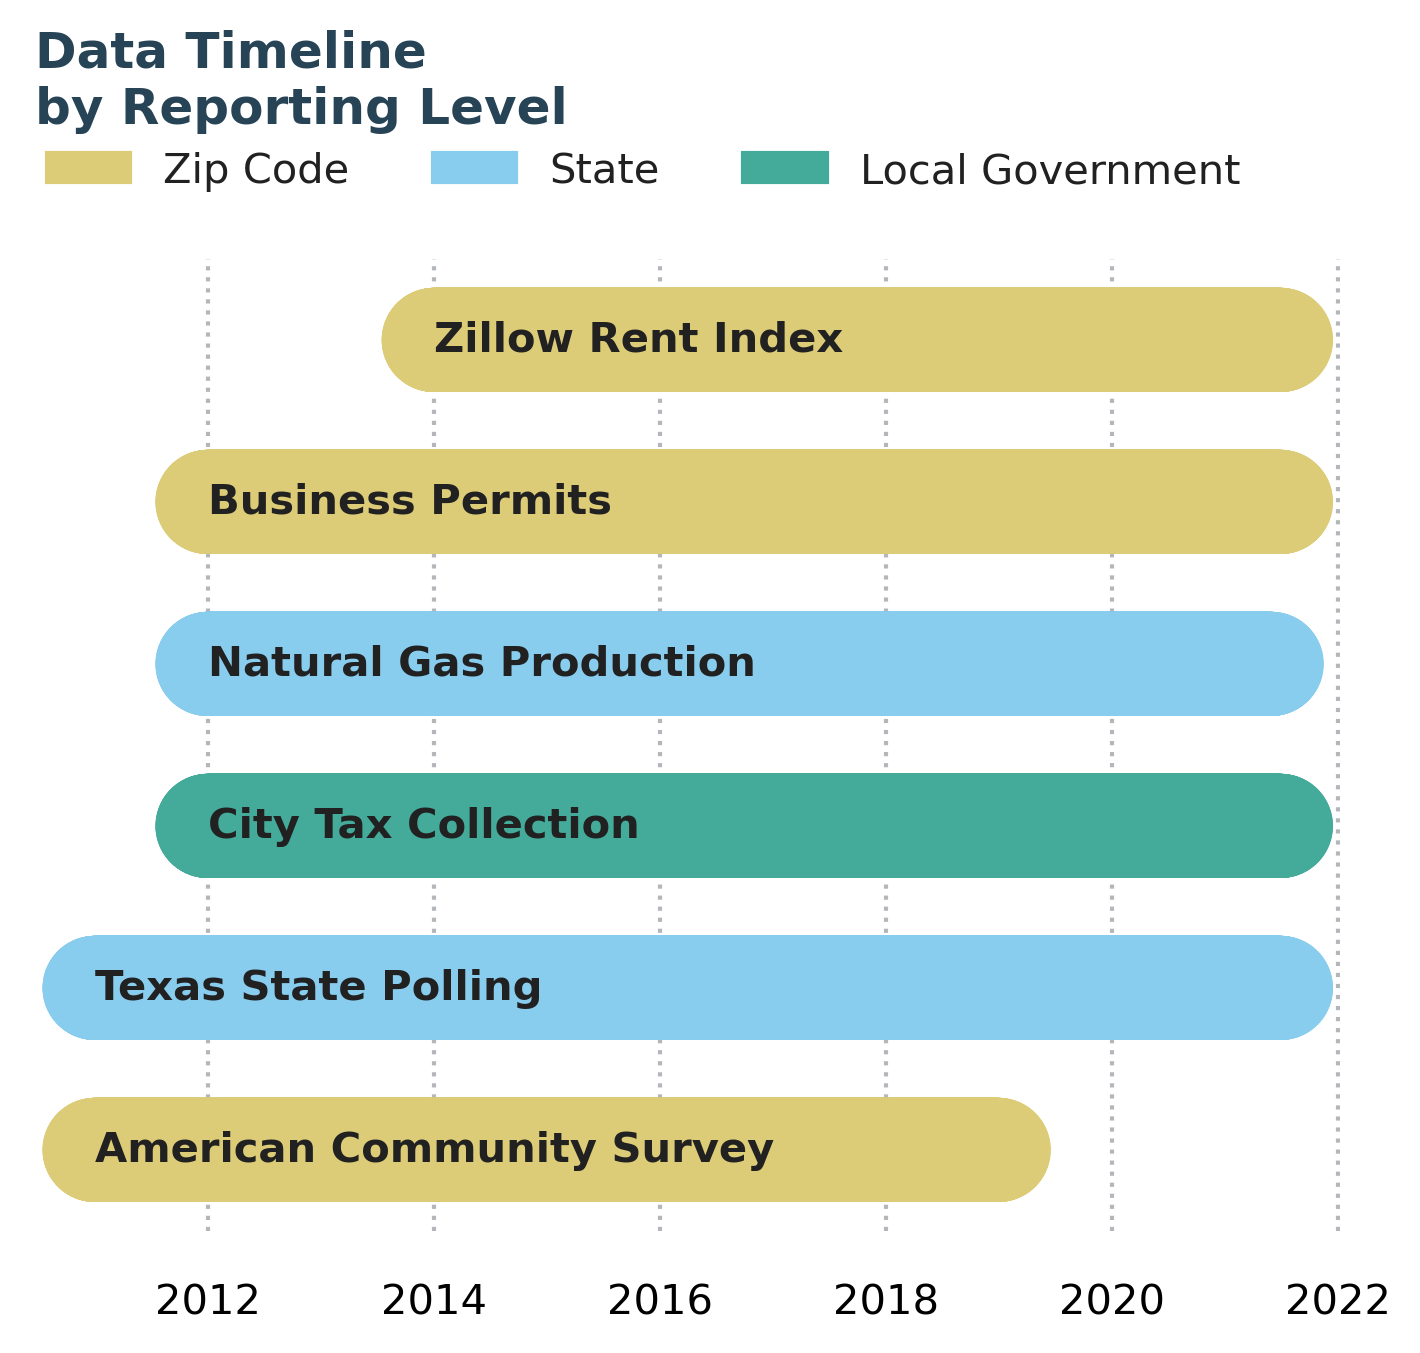

In [13]:
# ['cc6677', '332288', 'ddcc77', '117733', 
#  '88ccee', '882255', '44aa99', '999933', 'aa4499']
colors = ['#ddcc77','#88ccee','#44aa99']

fig, ax= plt.subplots(figsize=(5,4))
g=sns.stripplot(hue="data_level",y='data_num', x="date",
              data=viz_df,orient="h", 
              jitter=False, s=25, linewidth=0,ax=ax,
              palette=colors
               )
for row in range(0,len(df),2):
    plt.text(x = df.loc[row,'date'], 
             y = df.loc[row,'data_num'], 
             s = df.loc[row,'data_name'],
            verticalalignment='center',
            fontweight='bold',
            color = '#212121')
    
# legend
acutal_patch = mpatches.Patch(color=colors[0], 
                           label='Zip Code')
lasso_patch = mpatches.Patch(color=colors[1], 
                           label='State')
rf_patch = mpatches.Patch(color=colors[2], 
                           label='Local Government')
plt.legend(handles=[acutal_patch,lasso_patch,rf_patch],
           loc='center left', 
           bbox_to_anchor=(-0.02, 1.09),frameon=False,ncol=3,
                title = '')
    
# turn off axis labels and titles
g.set(xlabel='', ylabel='',title='Data Timeline\nby Reporting Level\n\n')

# axis spine options are ['left','right','bottom','top']
# ax.spines['bottom'].set_visible(True)
g.set_yticklabels([])
# make the highlighted features bold. should be the same side with the visible spine
plt.show()

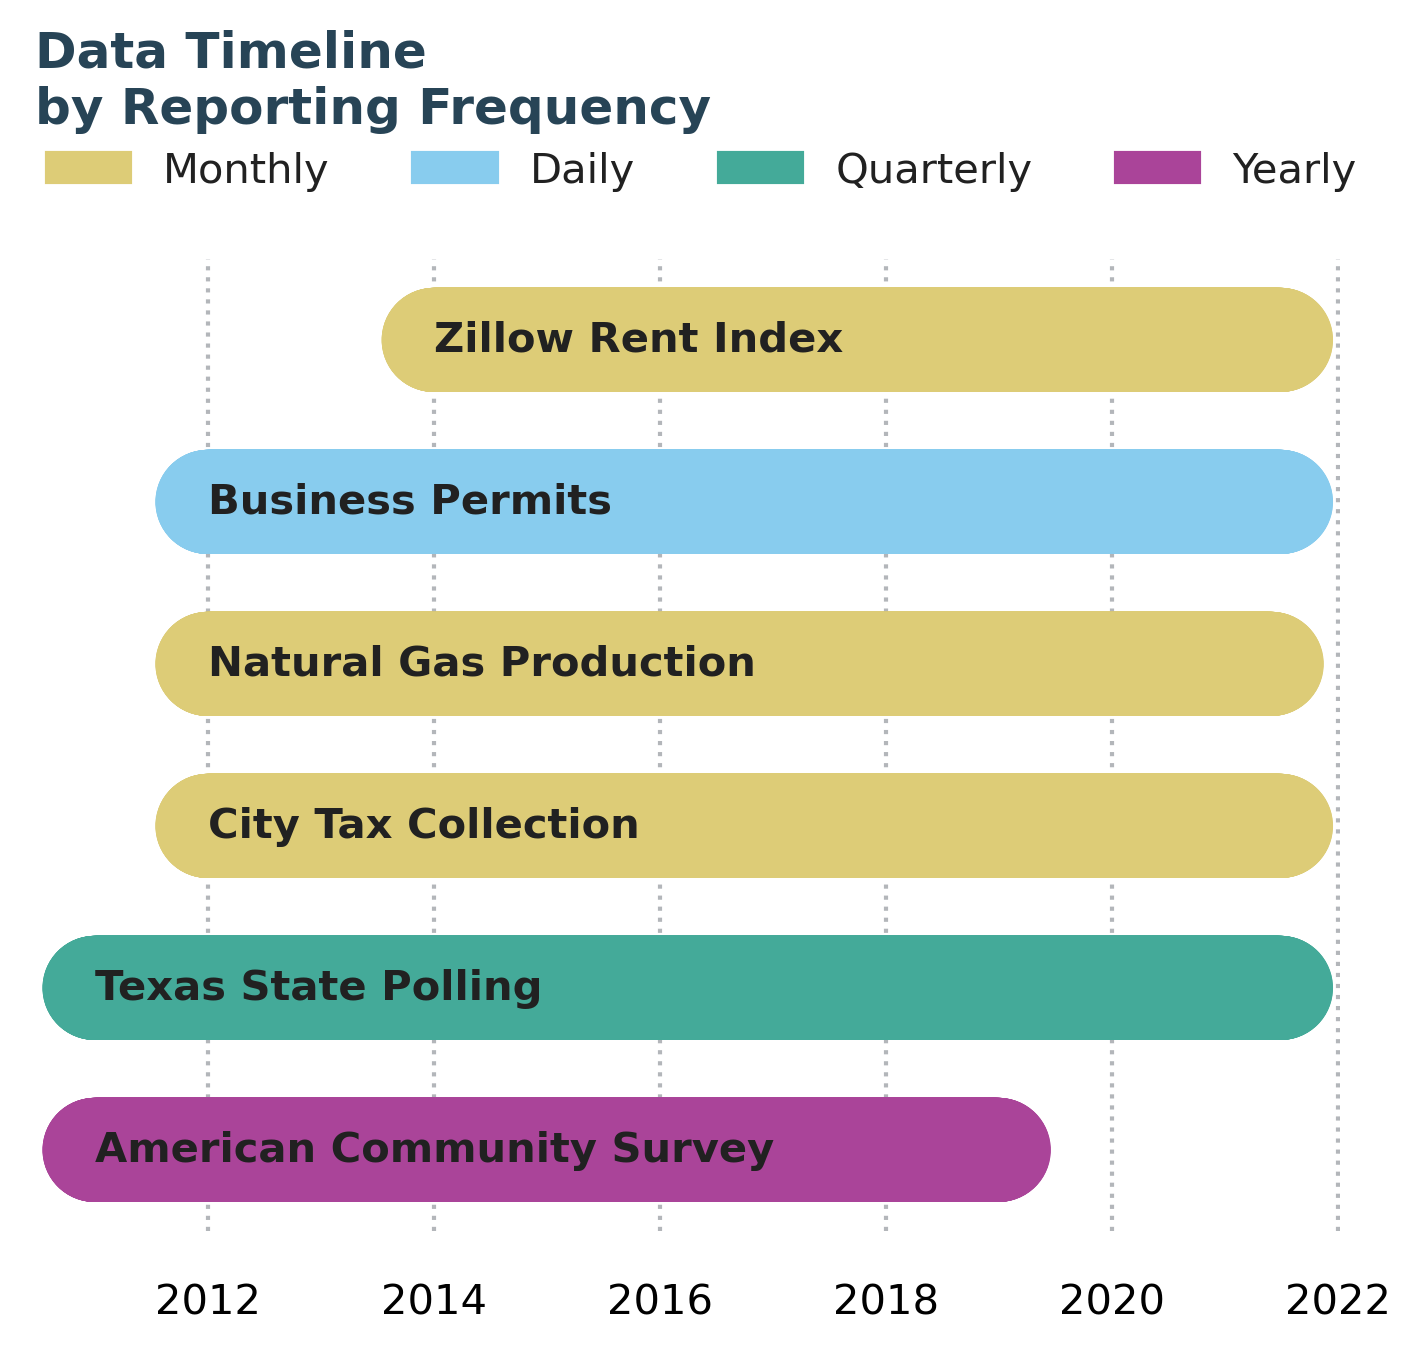

In [14]:
# ['cc6677', '332288', 'ddcc77', '117733', 
#  '88ccee', '882255', '44aa99', '999933', 'aa4499']
colors = ['#ddcc77','#88ccee','#44aa99','#aa4499']

fig, ax= plt.subplots(figsize=(5,4))
g=sns.stripplot(hue="frequency",y='data_num', x="date",
              data=viz_df,orient="h", 
              jitter=False, s=25, linewidth=0,ax=ax,
              palette=colors
               )
for row in range(0,len(df),2):
    plt.text(x = df.loc[row,'date'], 
             y = df.loc[row,'data_num'], 
             s = df.loc[row,'data_name'],
            verticalalignment='center',
            fontweight='bold',
            color = '#212121')
    
# legend
Monthly = mpatches.Patch(color=colors[0], 
                           label='Monthly')
Daily = mpatches.Patch(color=colors[1], 
                           label='Daily')
Quarterly = mpatches.Patch(color=colors[2], 
                           label='Quarterly')
Yearly = mpatches.Patch(color=colors[3], 
                           label='Yearly')
plt.legend(
    handles=[Monthly,Daily,Quarterly,Yearly],
           loc='center left', 
           bbox_to_anchor=(-0.02, 1.09),frameon=False,ncol=4,
                title = '')
    
# turn off axis labels and titles
g.set(xlabel='', ylabel='',title='Data Timeline\nby Reporting Frequency\n\n')

# axis spine options are ['left','right','bottom','top']
# ax.spines['bottom'].set_visible(True)
g.set_yticklabels([])
# make the highlighted features bold. should be the same side with the visible spine
plt.show()